# Breast Cancer Prediction Project

## Problem Statement

Breast cancer is one of the most common cancers among women worldwide. Early detection significantly increases treatment success rates and patient survival. However, manual classification of breast masses through visual examination of cell samples is time-consuming and can be subject to human error.

This project aims to use machine learning to assist in the accurate diagnosis of breast cancer using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

## About the dataset

This project uses the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, which contains features computed from digitized images of fine needle aspirates (FNAs) of breast masses.  The dataset is available from the UCI Machine Learning Repository and can be downloaded [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Environment Setup Cell

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')

from IPython.display import Image
from src.data_preprocessing import load_dataset, explore_dataset, preprocess_data, visualize_data, save_processed_dataset
from src.model_training import train_models, evaluate_model, visualize_results, save_best_model, feature_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

print("Environment setup completed.")

Environment setup completed.


## Data Loading & Exploration

Let's load the Wisconsin Breast Cancer dataset and explore its basic characteristics.

In [2]:
data_path = '../data/raw/wdbc.data'
df = load_dataset(data_path)

print("First 5 rows of the dataset:")
df.head()

Data loaded successfully with shape: (569, 32)
First 5 rows of the dataset:


,id,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
explore_dataset(df)

\Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   radius_se                569 non-null    float64
 4   radius_worst             569 non-null    float64
 5   texture_mean             569 non-null    float64
 6   texture_se               569 non-null    float64
 7   texture_worst            569 non-null    float64
 8   perimeter_mean           569 non-null    float64
 9   perimeter_se             569 non-null    float64
 10  perimeter_worst          569 non-null    float64
 11  area_mean                569 non-null    float64
 12  area_se                  569 non-null    float64
 13  area_worst               569 non-null    float64
 14  smooth

## Feature Descriptions

The dataset contains features computed from digitized images of breast mass FNAs:

- **ID**: Patient identifier
- **Diagnosis**: M = malignant, B = benign (converted to 1 and 0)
- **Ten real-valued features** measured as mean, standard error, and "worst" (mean of the three largest values)

These features include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

## Data Visualization

Visualizations saved in '../reports/figures' directory.


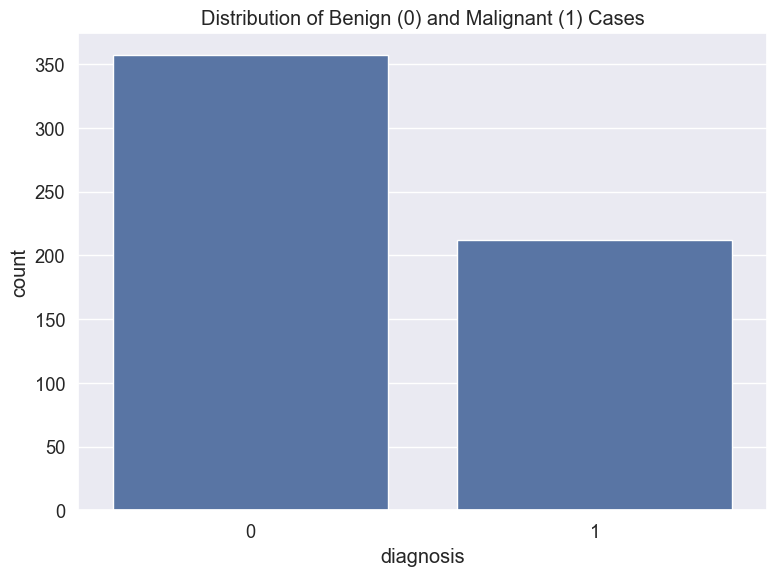

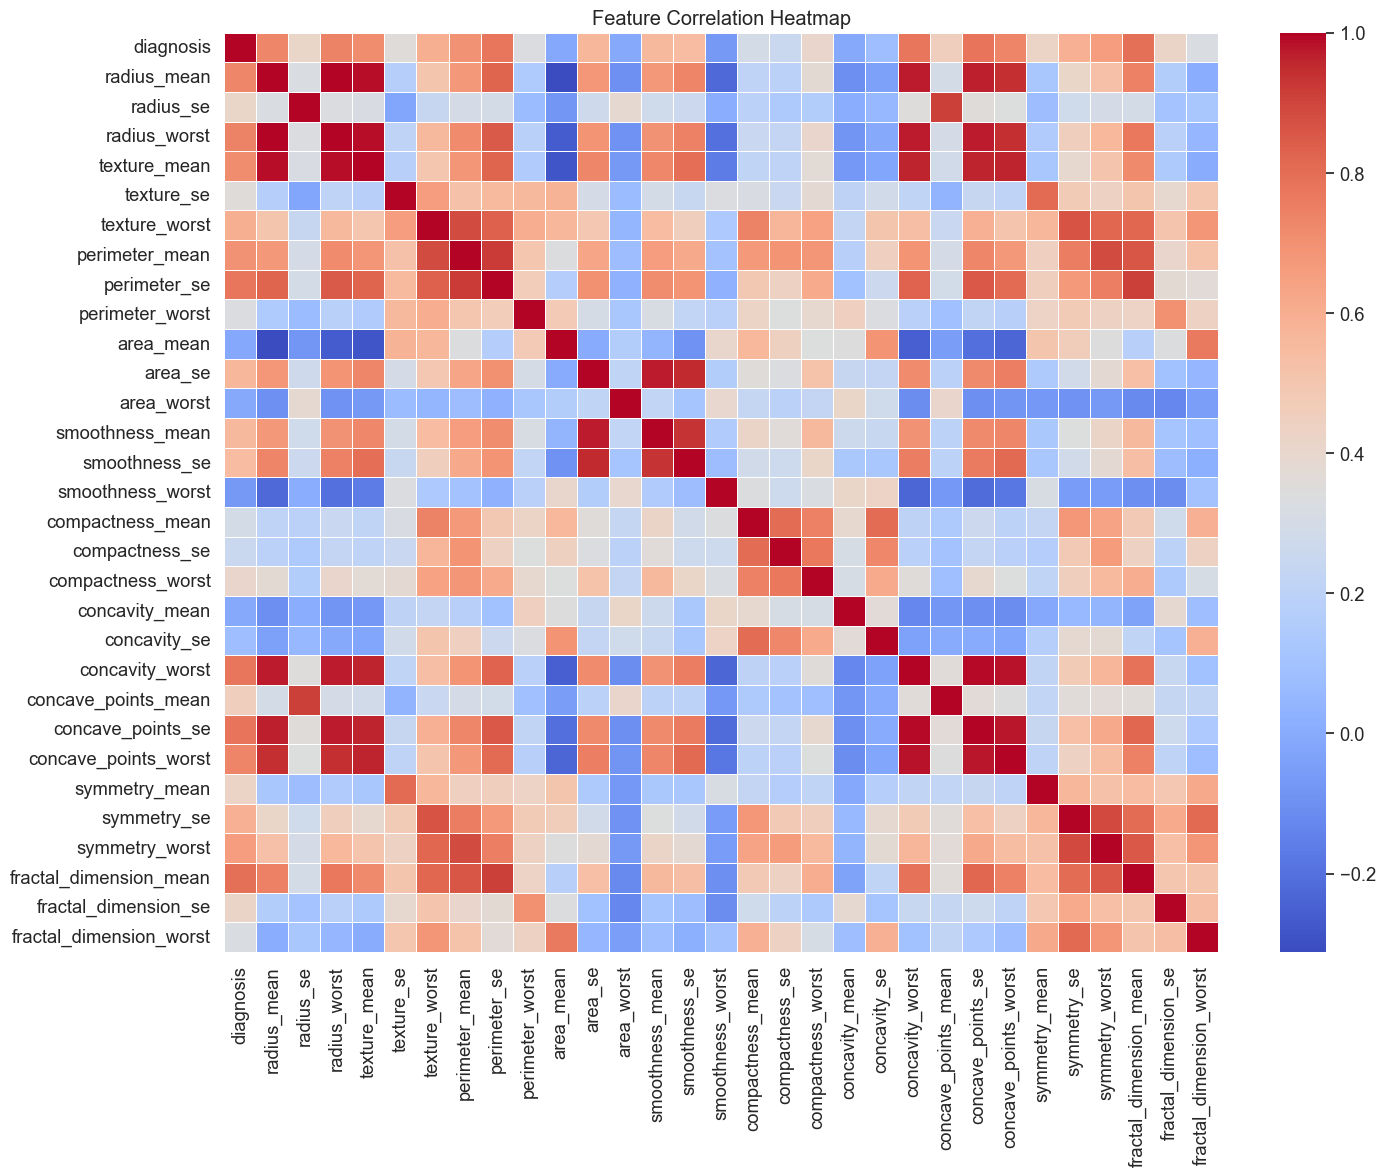

In [4]:
visualize_data(df)

## Data Preprocessing

In [5]:
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

print(f"Preprocessing complete. Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (455, 30), Testing set shape: (114, 30)
Feature scaling applied.

Preprocessing complete. Training set shape: (455, 30), Test set shape: (114, 30)


## Save Preprocessed Data

In [6]:
save_processed_dataset(X_train, X_test, y_train, y_test, scaler)

Preprocessed data saved in '../data/processed' directory.


## Model Training

In [7]:
trained_models = train_models(X_train, y_train)
print(f"Successfully trained {len(trained_models)} models")

Training Logistic Regression model.
Logistic Regression model trained completed.

Training Decision Tree model.
Decision Tree model trained completed.

Training Random Forest model.
Random Forest model trained completed.

Training SVM model.
SVM model trained completed.

Training KNN model.
KNN model trained completed.

Successfully trained 5 models


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features

## Model Evaluation


Evaluating Logistic Regression model.

Evaluation results for Logistic Regression:
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Evaluating Decision Tree model.

Evaluation results for Decision Tree:
Accuracy: 0.9298
Precision: 0.9048
Recall: 0.9048
F1 Score: 0.9048

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Evaluat

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Visualizations saved in '../reports/figures' directory.


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


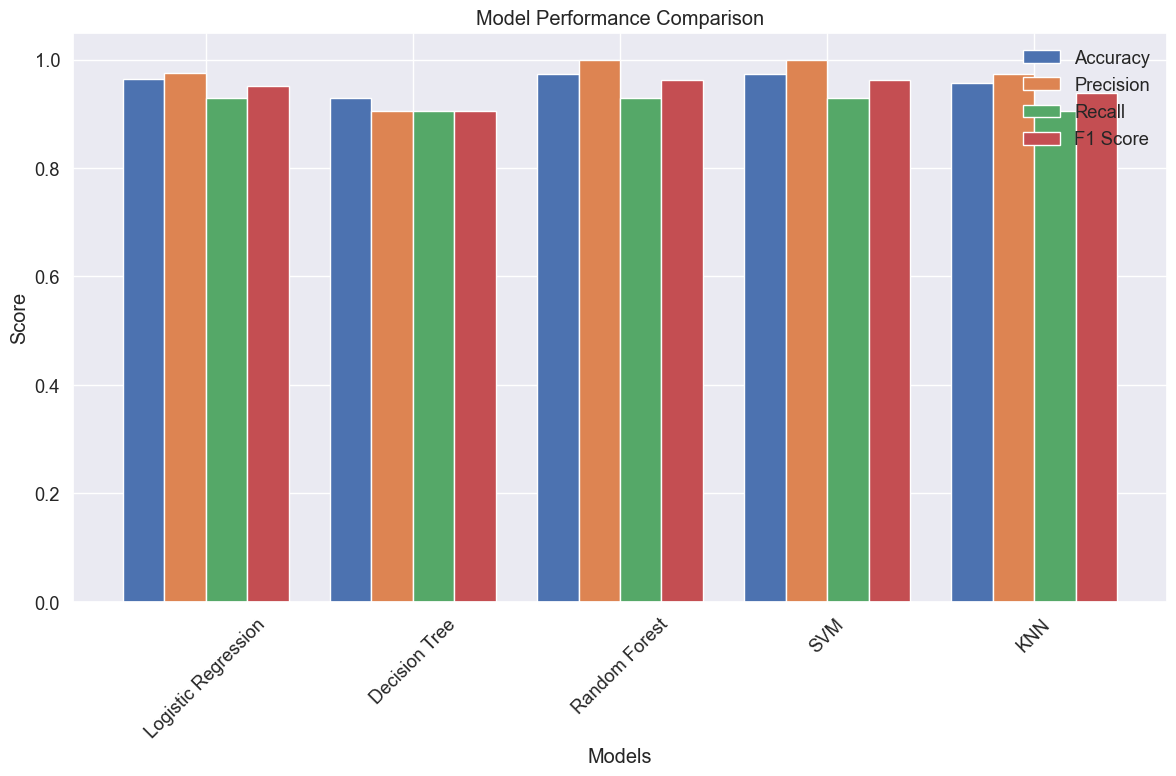

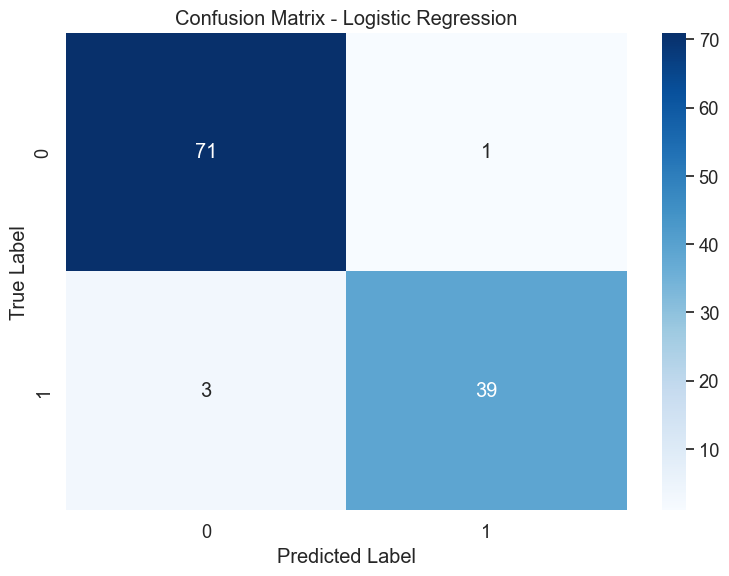

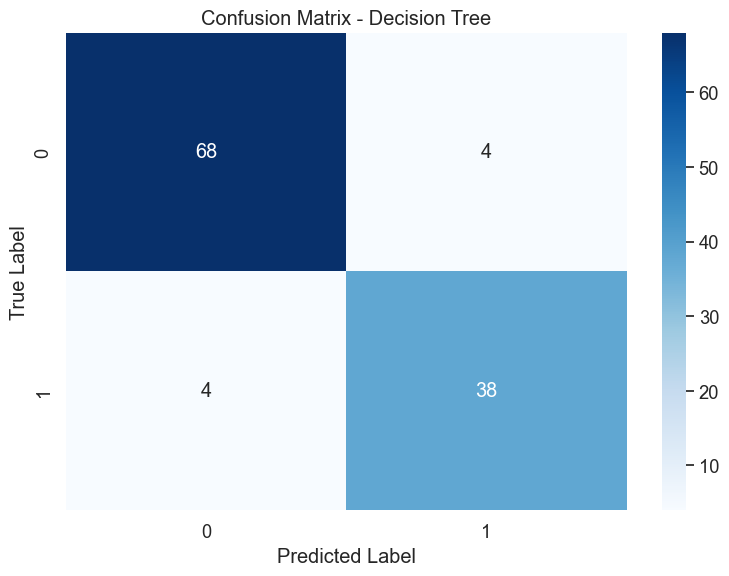

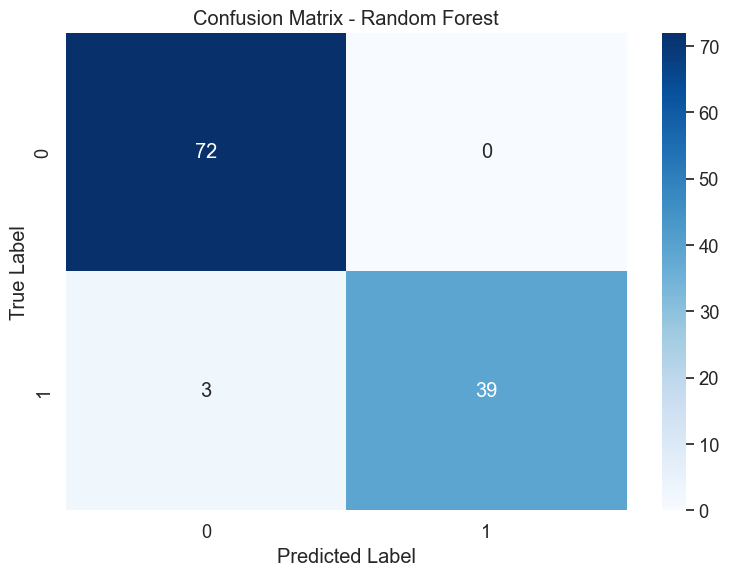

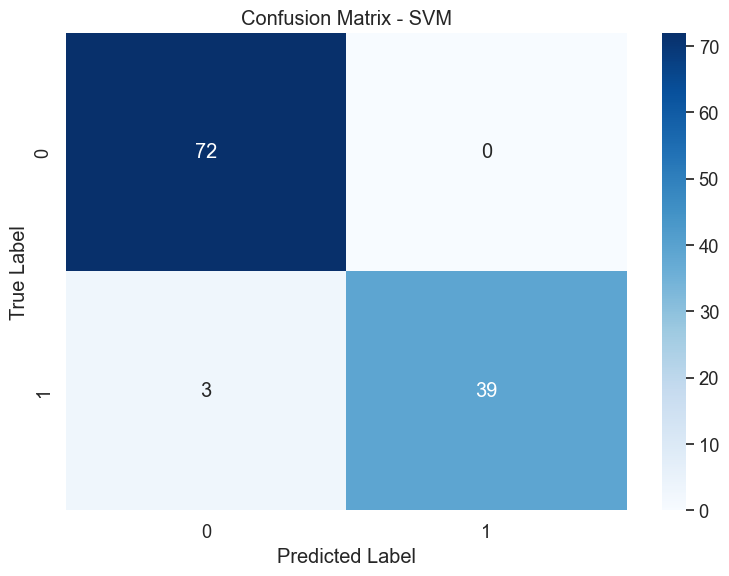

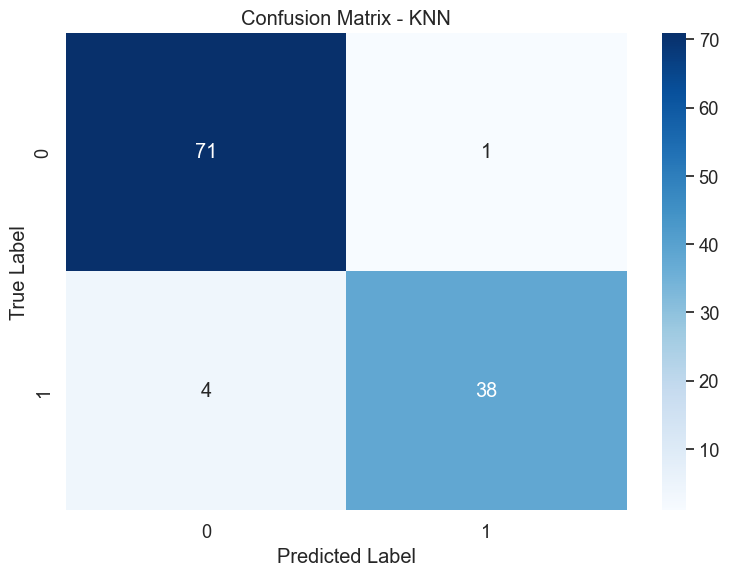

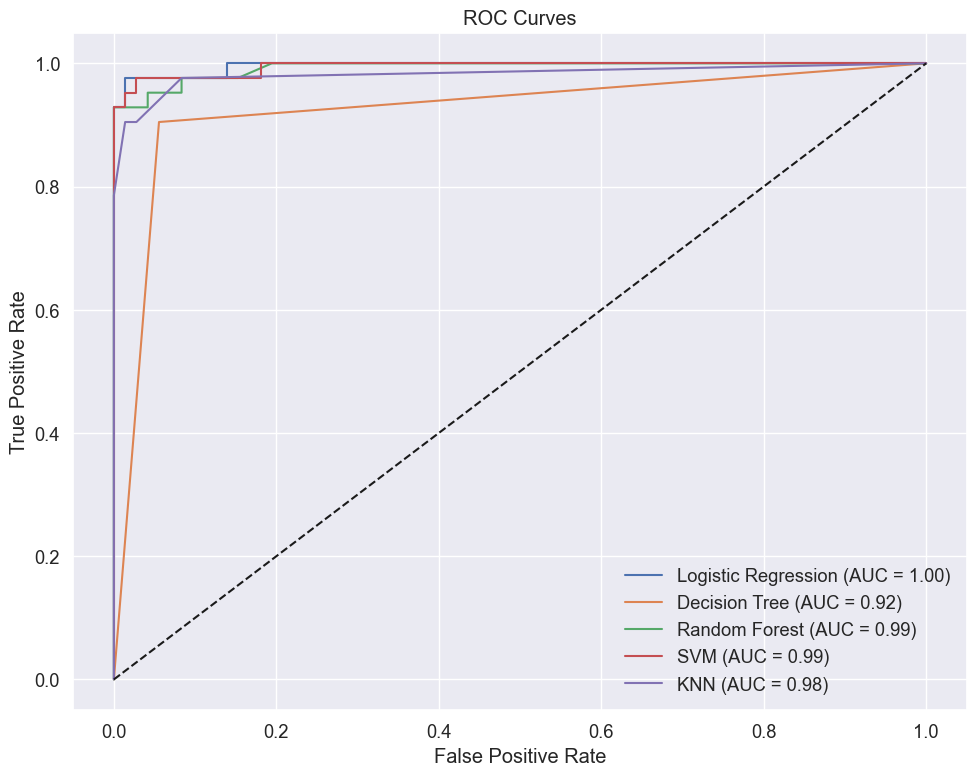

In [8]:
model_results = []
for name, model in trained_models.items():
    print(f"\nEvaluating {name} model.")
    results = evaluate_model(model, X_test, y_test, name)
    results['model'] = model
    model_results.append(results)

visualize_results(model_results, X_test, y_test)

## Feature Importance


Top 10 important features for Decision Tree:
concave_points_se: 0.7275
fractal_dimension_mean: 0.0790
symmetry_mean: 0.0408
radius_se: 0.0379
concave_points_mean: 0.0225
texture_mean: 0.0225
concavity_worst: 0.0175
concave_points_worst: 0.0156
perimeter_se: 0.0134
compactness_se: 0.0070

Top 10 important features for Random Forest:
concave_points_worst: 0.1514
fractal_dimension_mean: 0.1265
concavity_worst: 0.0935
concave_points_se: 0.0836
perimeter_se: 0.0811
radius_worst: 0.0771
radius_mean: 0.0620
perimeter_mean: 0.0508
texture_mean: 0.0459
symmetry_worst: 0.0300


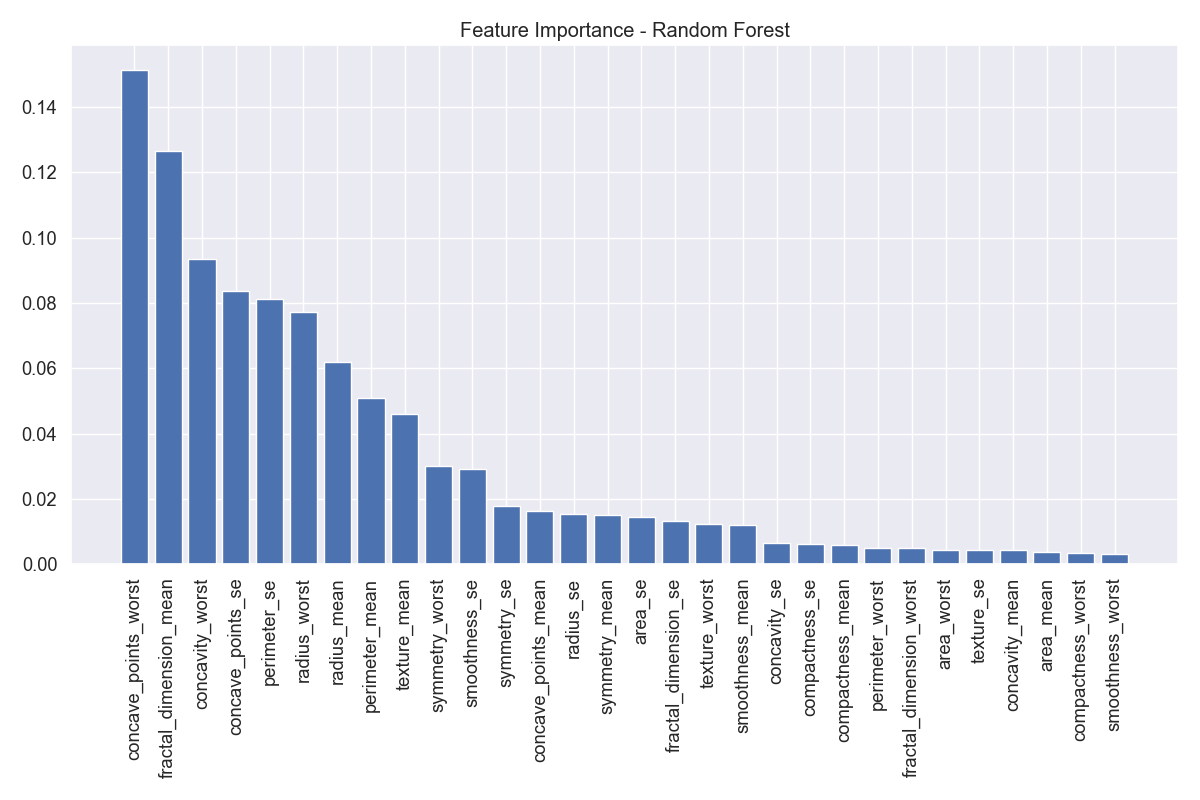

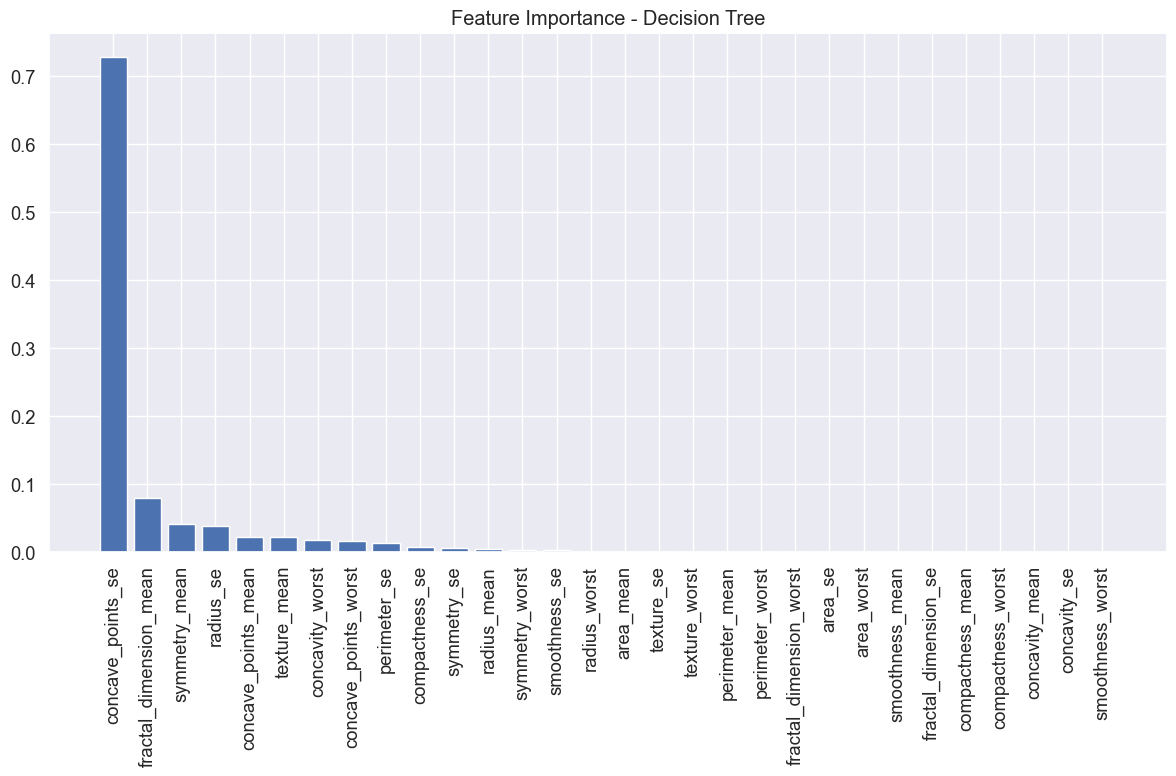

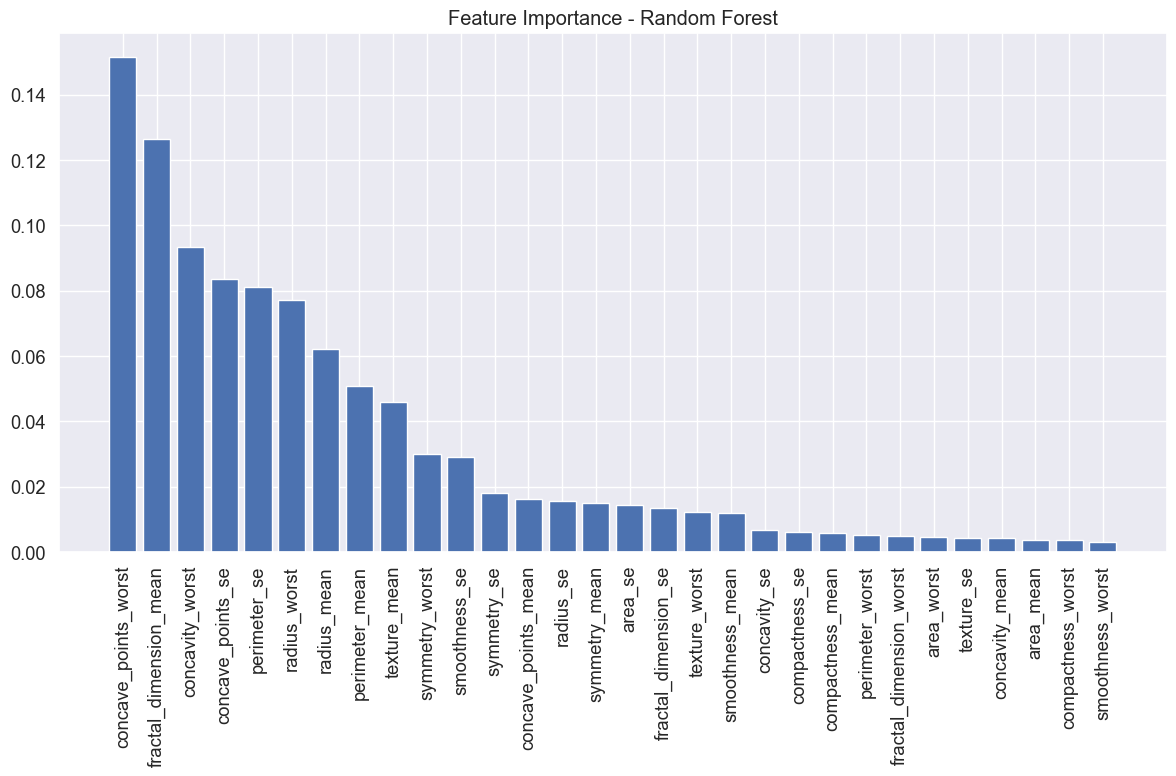

In [9]:
feature_names = df.drop(['id', 'diagnosis'], axis=1).columns.tolist()

feature_importance(model_results, X_train, feature_names)

Image(filename='../reports/figures/feature_importance_Random_Forest.png')

## Final Model Selection

In [10]:
save_best_model(model_results)

Best model (Random Forest) saved to ../models/random_forest.joblib
Model metrics:
  accuracy: 0.9737
  precision: 1.0000
  recall: 0.9286
  f1: 0.9630
